## Content

1. Import libraries
2. Data Exploration
	- Train VS Test datasets
	- Positive VS negative tweets
	- Label distribution
	- Tweet length analysis (character length)
	- Box plot
	- Wordcloud 

## 1. Import libraries

In [30]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns # for visualization
import matplotlib.pyplot as plt # for visualization
from IPython.display import display

# setting up the background style for the plots
plt.style.use('fivethirtyeight')
%matplotlib inline

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## 2. Data Exploration

In [31]:
train = pd.read_csv('C:/Users/lenovo/Desktop/hate_speech_detection/train.csv')
test  = pd.read_csv('C:/Users/lenovo/Desktop/hate_speech_detection/test.csv')

In [32]:
# display () is a function in the IPython.display module that runs the appropriate method 
# to get the appropriate data

display(train.head(5))
display(test.head(5))

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedication #willpower to find #newmaterialsâ¦
1,31964,@user #white #supremacists want everyone to see the new â #birdsâ #movie â and hereâs why
2,31965,safe ways to heal your #acne!! #altwaystoheal #healthy #healing!!
3,31966,"is the hp and the cursed child book up for reservations already? if yes, where? if no, when? ððð #harrypotter #pottermore #favorite"
4,31967,"3rd #bihday to my amazing, hilarious #nephew eli ahmir! uncle dave loves you and missesâ¦"


In [33]:
# Label encodings
labels = {0: "not offensive", 1: "offensive"}
print(labels)

{0: 'not offensive', 1: 'offensive'}


### 2.1 Train VS Test datasets

Let’s check dimensions of the train and test dataset.

In [34]:
train.shape, test.shape

((31962, 3), (17197, 2))

Train set has 31,962 tweets and test set has 17,197 tweets. LET'S GO DEEPER:

**A. Train dataset**

In [35]:
#Training data info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


**Info:** 

* The train dataset has three columns - "id", "label", "tweet"
    * **Column "id"** is not useful for classification.
    * **Column "tweet"** contains the tweets 
    * **Column "label"** contains their category.
* We have approx. 31K data points and there are no null value presents in the training data

In [36]:
# train data description
train.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


**B. Test dataset**

In [37]:
#Test data info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


**Info:** We have approx 17K data points and there are no null value presents in the test data

In [38]:
# test data description
test.describe()

,id
count,17197.000000
mean,40561.000000
std,4964.490625
min,31963.000000
25%,36262.000000
50%,40561.000000
75%,44860.000000
max,49159.000000


**C. Train vs test datasets: tweet length**

Now we will check the distribution of length of the tweets in both train and test data.

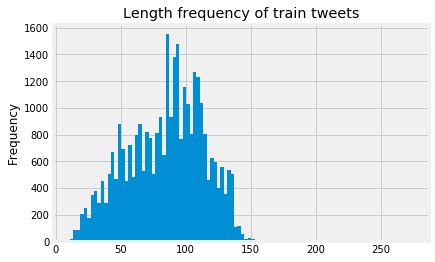

In [39]:
train['tweet'].apply(len).plot(bins=100, kind = 'hist')
plt.title('Length frequency of train tweets')
plt.show()

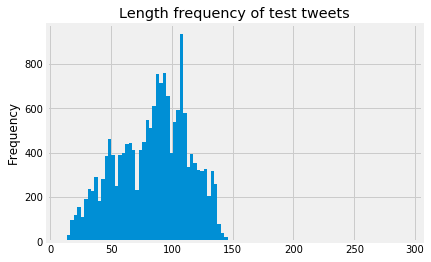

In [40]:
test['tweet'].apply(len).plot(bins=100, kind = 'hist')
plt.title('Length frequency of test tweets')
plt.show()

The above histogram shows us the length frequency of the each tweet from the dataset. Most sentence lengths lie between 70-120

### 2.2 Positive VS negative tweets

A. Check out a few non racist/sexist (negative) tweets.

In [41]:
train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


B. Check out a few racist/sexist (positive) tweets.

In [42]:
train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


### 2.3 Label distribution

Let’s have a glimpse at label-distribution in the train dataset.

In [43]:
# get counts
train["label"].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [44]:
# get counts and percentages
counts = pd.DataFrame({
    'Label': train['label'].value_counts().index,
    'Count': train['label'].value_counts().values,
    'Percentage':  train['label'].value_counts().values/train.shape[0]
})
counts.head()

,Label,Count,Percentage
0,0,29720,0.929854
1,1,2242,0.070146


In [45]:
# get percentages
pos_tweet = train['label'].value_counts()[0]
neg_tweet = train['label'].value_counts()[1]

total = len(train)

print("percentage of positive tweets : ", (pos_tweet/total)*100)
print("percentage of negative tweets : ", (neg_tweet/total)*100)

percentage of positive tweets :  92.98542018647143
percentage of negative tweets :  7.014579813528565


Tweets without hate speech represents almost 93% of the dataset

Text(0, 0.5, 'No. of Tweets')

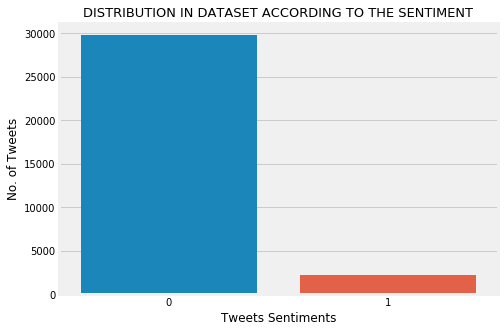

In [46]:
#Frequency plot of classes (using bar plot)
plt.figure(figsize=(7, 5))
plt.title('DISTRIBUTION IN DATASET ACCORDING TO THE SENTIMENT', fontsize=13)
sns.countplot(data=train, x='label')
plt.xlabel('Tweets Sentiments', fontsize=12)
plt.ylabel('No. of Tweets', fontsize=12)

In the plot above, we can understand that most of the data are labelled as 0 (not-offensive tweets), while 1 means offensive tweets.

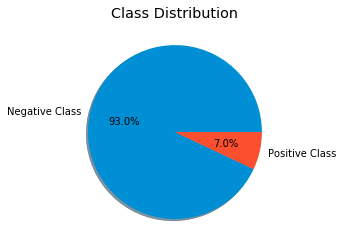

In [47]:
#Frequency plot of classes (using pie plot)
chat_data = train['label'].value_counts()
plt.pie(chat_data, autopct='%1.1f%%', shadow=True,labels=['Negative Class','Positive Class'])
plt.title('Class Distribution');
plt.show()

**Unbalanced Data**

In the train dataset, we have 2,242 (7%) tweets labeled as racist or sexist, and 29,720 (93%) tweets labeled as non racist/sexist. So, it is an imbalanced classification challenge. Due to this class imbalance, **accuracy** may not be a good option for checking performance of our models. Instead, **confusion matrix** or **F1** can be a good option.

### 2.4 Tweet length analysis (character length)

Knowing the max number of words in the dataset will be helpful later. Let's extract the length of each tweet in the training data

In [48]:
#Creating the length column for tweet
train['pre_clean_len']=  [len(t) for t in train.tweet]
train

,id,label,tweet,pre_clean_len
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,102
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,86
4,5,0,factsguide: society now #motivation,39
...,...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸,68
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,131
31959,31960,0,listening to sad songs on a monday morning otw to work is sad,63
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act",67


**A. Average Tweet Length vs label**

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


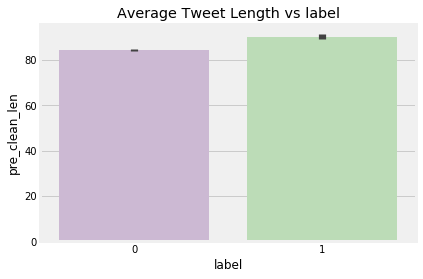

In [49]:
sns.barplot('label','pre_clean_len', data = train, palette='PRGn')
plt.title('Average Tweet Length vs label')
plt.show()

**B. Label counts**

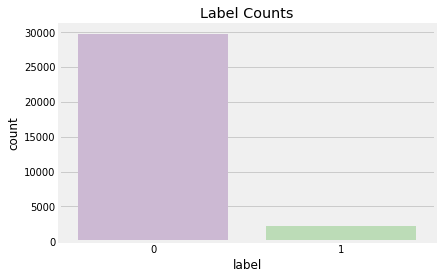

In [50]:
sns.countplot(x= 'label', data = train, palette="PRGn")
plt.title('Label Counts')
plt.show()

**C. Average hate tweets vs normal tweets**

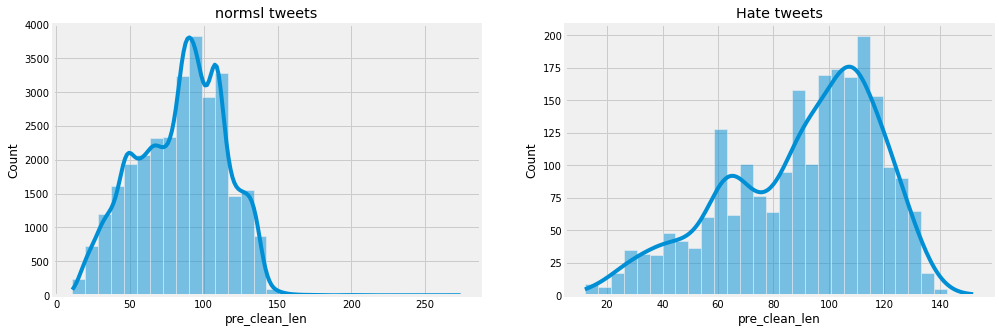

In [51]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
sns.histplot(train[train["label"] == 0]["pre_clean_len"],bins = 30,ax = ax1, kde=True).set(title = "normsl tweets")
sns.histplot(train[train["label"] == 1]["pre_clean_len"],bins = 30,ax = ax2, kde = True).set(title = "Hate tweets")
plt.show()

The distribution of both seems to be almost same. 90 to 120 characters in a tweet are the most common among both.

**D. Tweet lengths**

In [52]:
#Min length is 11, so let's see it
train[train['pre_clean_len']==11]['tweet'].iloc[0]

'i love you '

In [53]:
#Max length is 274, so let's see it
train[train['pre_clean_len']==274]['tweet'].iloc[0]

' @user lmfao pathetic #soit   #growup #funny #noonethere #iknowwhoitis ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98±ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f¤\x97ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82ð\x9f\x98\x82â\x80¦'

In [54]:
# lets viwe the meesage with average length
train[train['pre_clean_len']==85]

,id,label,tweet,pre_clean_len
115,116,0,â #under the spell of brexit referendum - commerzbank #blog #silver #gold #forex,85
242,243,0,make today count! #mondaymotivation #livelifetothefullest #healthy #everydaycounts,85
384,385,0,"dream palace, can we move in already? #stellar #girls #dreamy #goodmorning daysâ¦",85
573,574,0,@user monkeys are also declared as vermin. no protest from bajrang dal? @user @user,85
634,635,0,save thousands $$ free search x logins x brokers #actor #seeklearning #stafresh,85
...,...,...,...,...
31393,31394,0,"#flagday2016 #flag #day #2016 #(30 #photos) buy things about ""flag day 2016"": â¦",85
31468,31469,0,jts88troxy theater jts88@user ð #love #sinkthepink #music #instagay #celebspot,85
31542,31543,0,stretched to the limit and still #waiting patiently! #overdue #maybetomorrow #love,85
31773,31774,0,this reminds me of this. i am love these two ... they are golden. #arrow #olicity,85


**Lets split** the positive and negative tweets into two different lists.

**E. Split negative and positive tweets**

In [55]:
# Now separting positive and negative tweets
positive = train[train['label']==1]
positive

,id,label,tweet,pre_clean_len
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot,74
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins,101
17,18,1,retweet if you agree!,22
23,24,1,@user @user lumpy says i am a . prove it lumpy.,47
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia,104
...,...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenny #kentucky,59
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'm proud! #mailboxpride #liberalisme,82
31947,31948,1,@user @user you don't have the balls to hashtag me as a but you say i am to weasel away.. lumpy tony.. dipshit.,112
31948,31949,1,"makes you ask yourself, who am i? then am i anybody? until ....god . oh thank you god!",87


In [56]:
negative = train[train['label']==0]
negative

,id,label,tweet,pre_clean_len
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,102
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,86
4,5,0,factsguide: society now #motivation,39
...,...,...,...,...
31956,31957,0,off fishing tomorrow @user carnt wait first time in 2 years,61
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸,68
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,131
31959,31960,0,listening to sad songs on a monday morning otw to work is sad,63


In [57]:
# Exact numbers of positive tweet length
print('\033[5m'+'Positive Tweets:'+"\033[0;0m")
print('Minimum number of words are',positive.pre_clean_len.min())
print('Maximum number of words are',positive.pre_clean_len.max())

Positive Tweets:
Minimum number of words are 12
Maximum number of words are 152


In [58]:
# Exact numbers of negative tweet length
print('\033[5m'+'Negative Tweets:'+"\033[0;0m")
print('Minimum number of words are',negative.pre_clean_len.min())
print('Maximum number of words are',negative.pre_clean_len.max())

Negative Tweets:
Minimum number of words are 11
Maximum number of words are 274


It looks that negative (non-offensive) tweets tend to be longer than positive tweets

### 2.5 Box plot

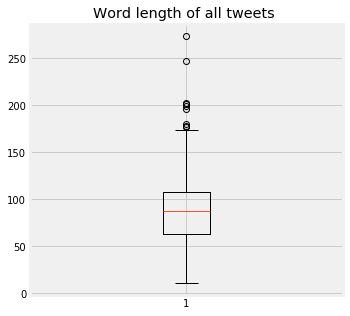

In [59]:
#Box plot of all data
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(train.pre_clean_len)
plt.title('Word length of all tweets ')
plt.show()

The x-axis represents 'tweets' while the y-axis represents number of characters.

The number of characters between 25th and 75th %ile (Interquartile range) of data ranges from 60 to 110 tokens, median being 80 tokens. Max length of any tweet in the dataset is less than 275 tokens

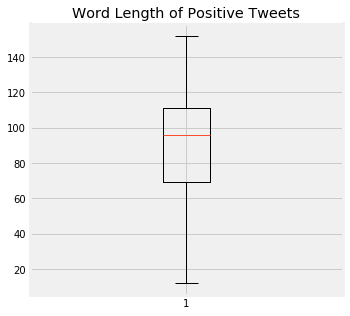

In [60]:
#Box plot of positive data
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(train[train['label']==1].pre_clean_len)
plt.title('Word Length of Positive Tweets')
plt.show()

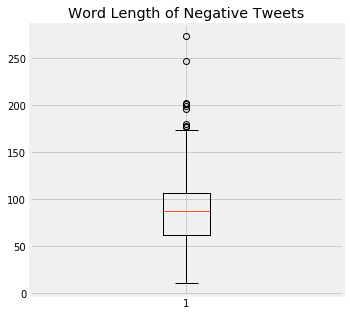

In [61]:
#Box plot of negative tweets
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(train[train['label']==0].pre_clean_len)
plt.title('Word Length of Negative Tweets')
plt.show()

**Box plot analysis**

1. **Negative class:** There are few outliers and the maximum length of the tweets going beyond 270
2. **Positive class:** There are no ouliers and the maximum numbers of words in a tweet are approxx 150

### 2.6 Wordcloud

**A wordcloud** is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

We can also think of questions related to the data in hand. A few probable questions are as follows:

- What are the most common words in the entire dataset?
- What are the most common words in the dataset for negative and positive tweets, respectively?
- How many hashtags are there in a tweet?
- Which trends are associated with my dataset?
- Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

Let’s visualize all the words our data using the wordcloud plot

**1) Word cloud of all tweets**

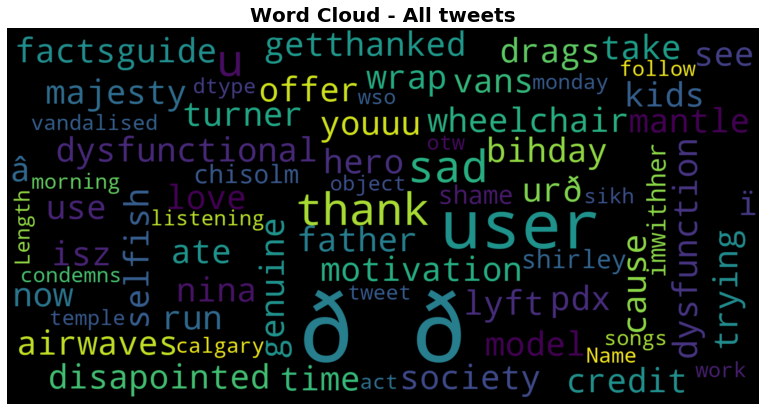

In [62]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(str(train['tweet']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - All tweets',fontsize=20,fontweight='bold')
plt.show()

With the help of wordcloud we can find most repeated words easily from the whole dataset. By the above image we can come to a conclusion that in our data 'user' is the word which repeated more number of times. And we have some unknown symbols also in our data. So, befor proceeding with modelling, we should first clean the data.

**2) Word cloud of positive tweets**

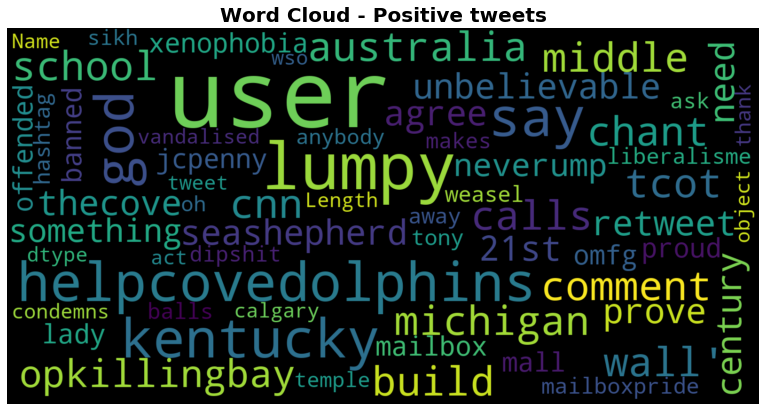

In [65]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(str(train[train['label']==1]['tweet']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - Positive tweets',fontsize=20,fontweight='bold')
plt.show()

**3) Word cloud of negative tweets**

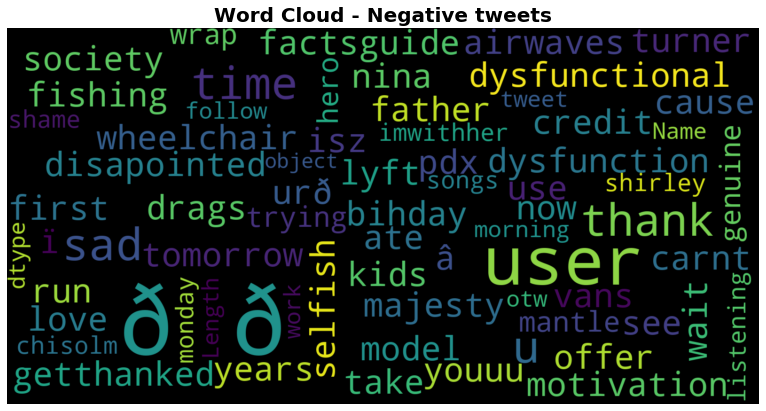

In [64]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(str(train[train['label']==0]['tweet']))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - Negative tweets',fontsize=20,fontweight='bold')
plt.show()

As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on.